In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set()

In [3]:
breast_cancer = load_breast_cancer()
x = pd.DataFrame(breast_cancer.data, columns = breast_cancer.feature_names)
x = x[['mean area', 'mean compactness']]
y = pd.Categorical.from_codes(breast_cancer.target, breast_cancer.target_names)
y = pd.get_dummies(y, drop_first = True)

In [4]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=1)

In [5]:
knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn.fit(x_train,y_train)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(metric='euclidean')

<Axes: xlabel='mean area', ylabel='mean compactness'>

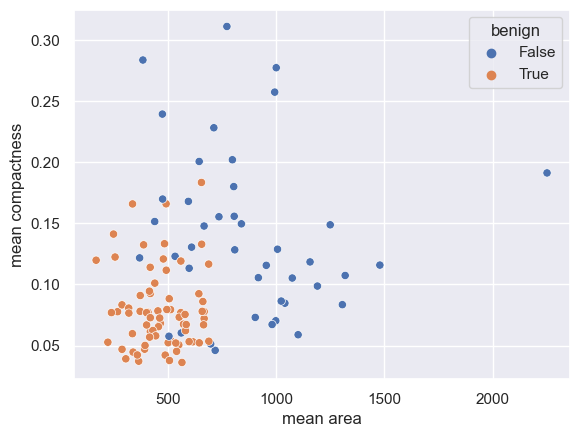

In [6]:
# visualizing the data

sns.scatterplot(
    x = 'mean area',
    y = 'mean compactness',
    hue = 'benign',
    data = x_test.join(y_test, how = 'outer')
)

In [8]:
y_pred = knn.predict(x_test)

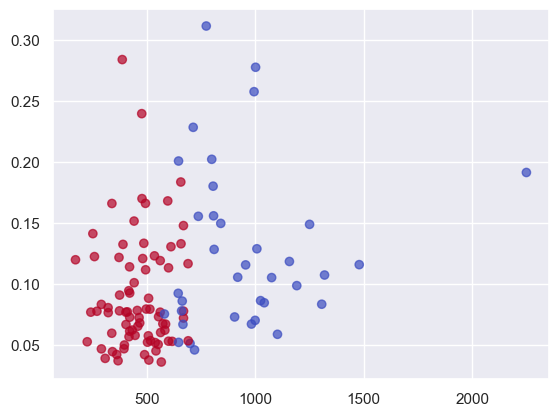

In [9]:
plt.scatter(
    x_test['mean area'],
    x_test['mean compactness'],
    c = y_pred,
    cmap = 'coolwarm',
    alpha = 0.7
)

In [10]:
confusion_matrix(y_test,y_pred)

array([[30, 12],
       [ 6, 66]])